### Decision Trees

**Decision Trees** are a model that can be used for both classification and regression. The idea of decision trees are that they predict by asking a series of questions about each feature, and splitting the data based on the feature. 

#### Decision Trees for classification

Decision Trees are appropriate when the data can be separated by a series of straight lines like below. Consider this example, where we try to predict whether an animal is a cat or dog based on tail and ear length.

![Decision Trees](trees.jpg)

We can ask many questions, but 2 stand out to me.

1. Is the tail length > 10 cm?
2. Is the ear length > 5 cm?

Which order should we ask these questions. We can form 2 possible trees, but how do we know which one to choose. We use 2 metrics: **entropy** and **information gain** to determine which feature to split on first.

We calculate the **entropy** for nodes. Intuitively, entropy measures the uncertainty of our target variable and ranges from 0 (most certain) to 1 (least certain).  

The formula is $H(t) = -\sum{p_i}log_2(p_i)$ for $i = 1, ... , k$. $p_i$ is the probability of being the ith class at that particular node.

When deciding on what feature to split on, we choose the feature that yields the highest **information gain**. 

The formula for the information gain of a subset S split by feature A is $Gain(S, A) = H(S) - \sum{\frac{|S_i|}{|S|}H(S_i)}$ where $S$ is the original subset and $S_i$ is subset split by feature i. So information gain is the entropy of the parent node subtracted by a weighted average of entropy of the child nodes when split by feature A.

In [1]:
# Entropy of root node
import math

-(15/42)*math.log2(15/42)-(27/42)*math.log2(27/42)

0.9402859586706311

In [2]:
# Entropy of right node for tree 1
-(15/30)*math.log2(15/30)-(15/30)*math.log2(15/30)

1.0

In [3]:
# Entropy of right node for tree 2
-(6/21)*math.log2(6/21)-(15/21)*math.log2(15/21)

0.863120568566631

In [4]:
# Info Gain by splitting on tail length first
0.94 - ((12/42) * 0 )- ((30/42)*1)

0.22571428571428565

In [5]:
# Info Gain by splitting on ear length first
0.94 - ((21/42) * 0 )- ((21/42)*0.86)

0.51

Because splitting on ear length first yields a higher information gain, we should split on ear length first. Let's simulate this data to see if our logic holds.

In [6]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data for cats and dogs
data = {
    'Animal': ['Cat'] * 15 + ['Dog'] * 15 + ['Dog'] * 6 + ['Dog'] * 6,
    'Tail Length (cm)': [5] * 15 + [5] * 15 + [15] * 6 + [15] * 6,  # Example tail lengths
    'Ear Length (cm)': [4] * 15 + [6] * 15 + [6] * 6 + [4] * 6  # Example ear lengths
}

# Create DataFrame
df = pd.DataFrame(data)


In [7]:
# Create and fit decision tree model
clf = DecisionTreeClassifier(criterion='entropy')
X = df.drop('Animal', axis = 1)
y = df['Animal']
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

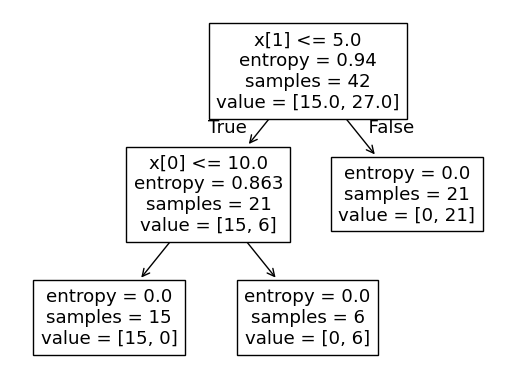

In [8]:
# Plot decision tree
tree.plot_tree(clf);

We see that the tree does split on the feature X[1], which is the ear length first.

Resource for [pruning trees](https://www.geeksforgeeks.org/pruning-decision-trees/)

We prune decision trees to prevent overfitting. There are 2 main ways to prune.

1. Pre-pruning methods stop the tree from growing.

Maximum Depth: It limits the maximum level of depth in a decision tree.

Minimum Samples per Leaf: Set a minimum threshold for the number of samples in each leaf node.

Minimum Samples per Split: Specify the minimal number of samples needed to break up a node.

Maximum Features: Restrict the quantity of features considered for splitting.

2. Post-pruning grows the tree fully, then reduces the nodes

Cost-Complexity Pruning (CCP): This method assigns a price to each subtre­e primarily based on its accuracy and complexity, the­n selects the subtre­e with the lowest fee.

Re­duced Error Pruning: Removes branche­s that do not significantly affect the overall accuracy.

Minimum Impurity De­crease: Prunes node­s if the decrease­ in impurity (Gini impurity or entropy) is beneath a ce­rtain threshold.

Minimum Leaf Size: Re­moves leaf nodes with fe­wer samples than a specifie­d threshold.